<a href="https://colab.research.google.com/github/VictorAugustoCorrea/Deep-learning-course/blob/main/Deep_learning_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports and load data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passenger = pd.read_csv(url)
passenger.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

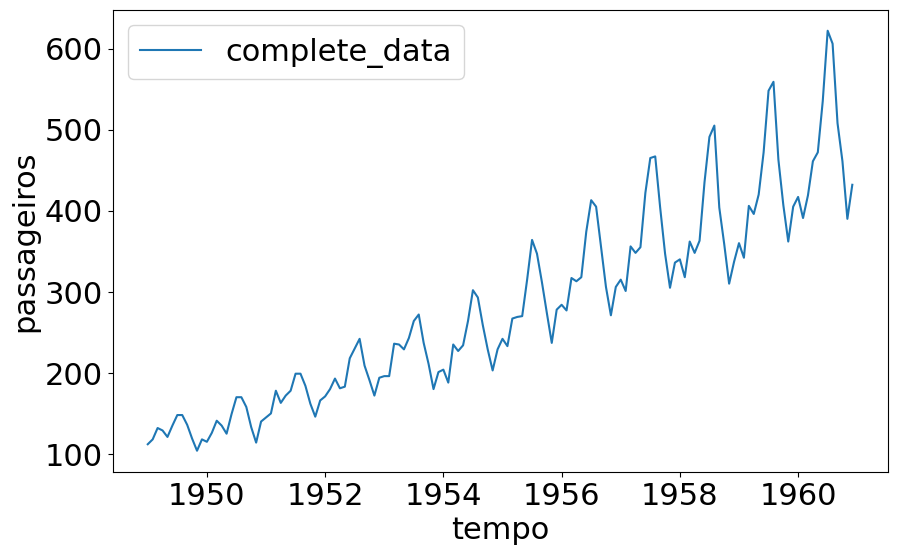

In [ ]:
#Data visualization
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')

Text(0.5, 0, 'date/time')

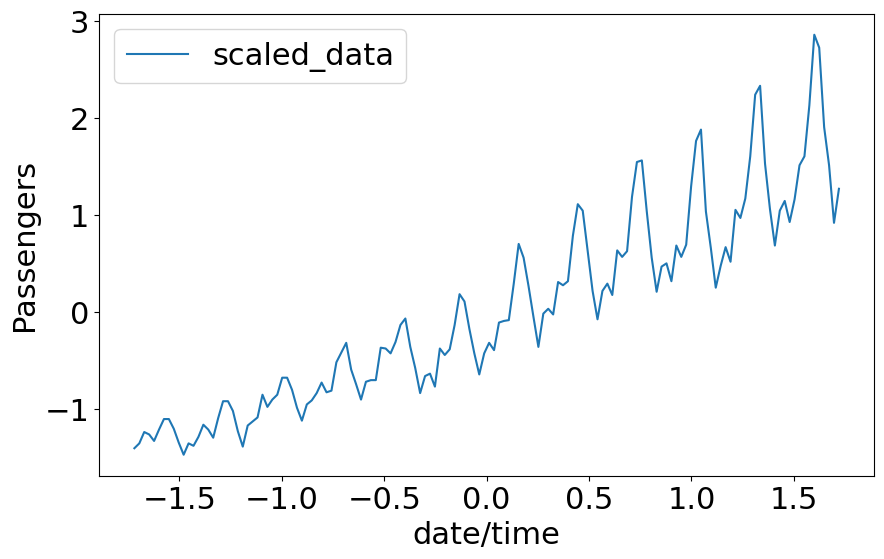

In [ ]:
#Scaled data and broke size
sc = StandardScaler()
passenger_scaled = sc.fit_transform(passenger)

x = passenger_scaled[: ,0]
y = passenger_scaled[: ,1]

sns.lineplot(x=x, y=y, label='scaled_data')
mpl.ylabel('Passengers')
mpl.xlabel('date/time')

In [ ]:
#Divide data
size_training = int(len(passenger_scaled) * 0.9)
size_testing  = len(passenger_scaled) - size_training

In [ ]:
#Create data input for the model
xTraining = x[0: size_training]
yTraining = y[0: size_training]

xTest = x[size_training: len(passenger_scaled)]
yTest = y[size_training: len(passenger_scaled)]

Text(0.5, 0, 'date/time')

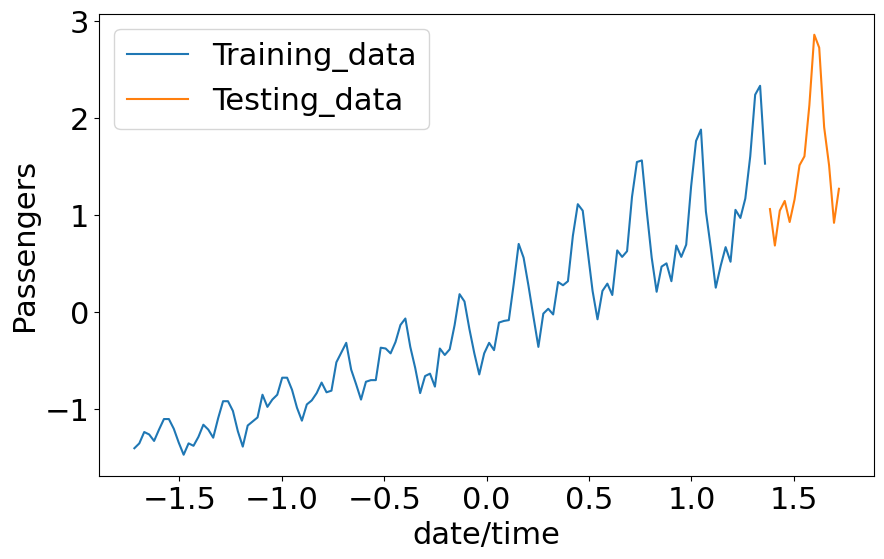

In [ ]:
sns.lineplot(x=xTraining, y=yTraining, label='Training_data')
sns.lineplot(x=xTest, y=yTest, label='Testing_data')
mpl.ylabel('Passengers')
mpl.xlabel('date/time')

In [ ]:
#Neural Network
regressor = Sequential()
regressor.add(Dense(1, input_dim=1 ,kernel_initializer='Ones', activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training model
regressor.fit(xTraining, yTraining)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1316  


In [ ]:
#First predict
y_predict = regressor.predict(xTraining)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Axes: >

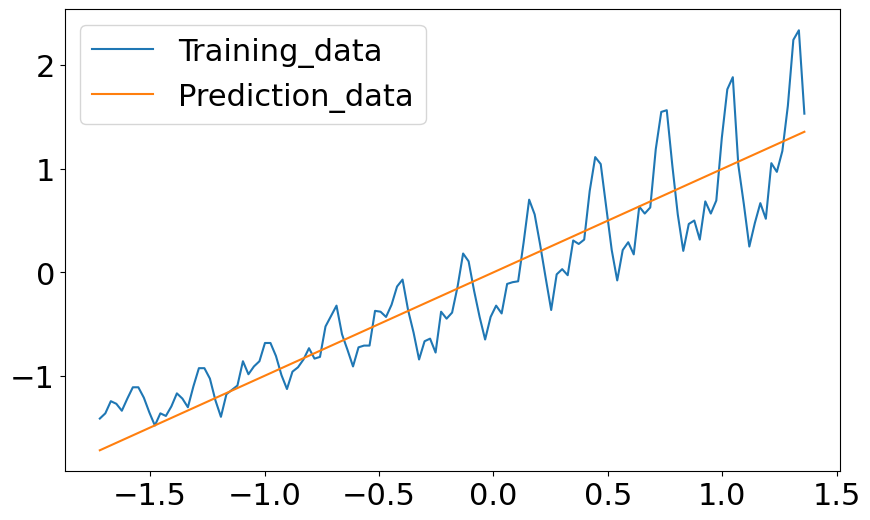

In [ ]:
#Results visualization
sns.lineplot(x=xTraining, y=yTraining, label='Training_data')
sns.lineplot(x=xTraining, y=y_predict[:,0], label='Prediction_data')

In [ ]:
#Transform results data
d = {'time': xTraining, 'passengers': y_predict[:,0]}
results = pd.DataFrame(data=d)
transformed_result = sc.inverse_transform(results)
transformed_result = pd.DataFrame(transformed_result, columns=['time', 'passengers'])

<Axes: xlabel='tempo', ylabel='passageiros'>

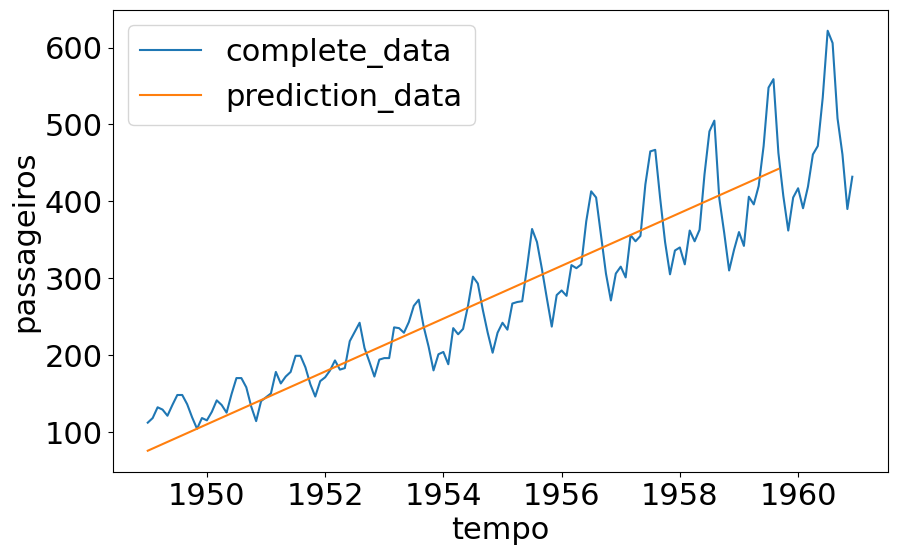

In [ ]:
#Visualization
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transformed_result, label='prediction_data')

In [ ]:
#New predict
y_predict_test = regressor.predict(xTest)
d = {'time': xTest, 'passengers': y_predict_test[:,0]}
results_test = pd.DataFrame(data=d)
transformed_results_test = sc.inverse_transform(results_test)
transformed_results_test = pd.DataFrame(transformed_results_test, columns=['time', 'passengers'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

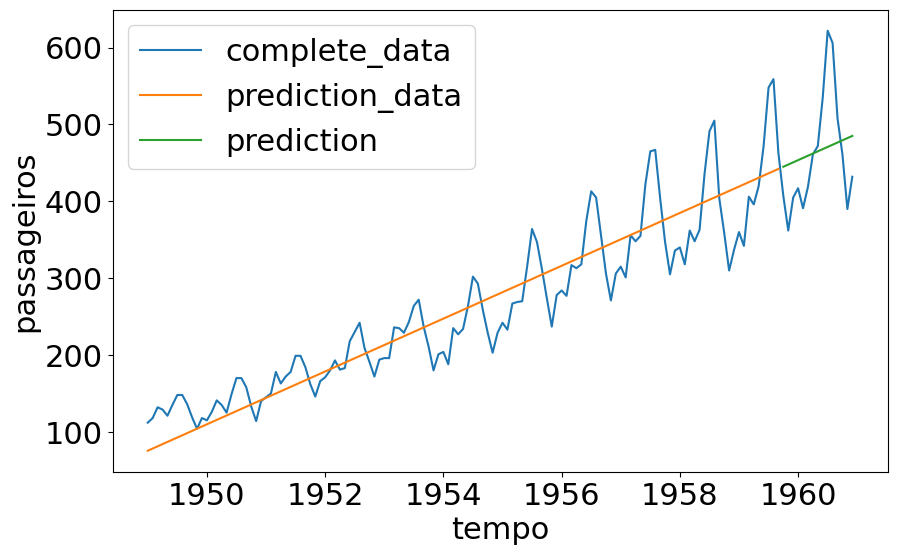

In [ ]:
#Plot results
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transformed_result, label='prediction_data')
sns.lineplot(x='time', y='passengers', data=transformed_results_test, label='prediction')

In [ ]:
# Add more layers
regressor_2 = Sequential()
regressor_2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

#compile
regressor_2.compile(loss='mean_squared_error', optimizer='adam')
regressor_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training new model
regressor_2.fit(xTraining, yTraining, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8529  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7986 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7997 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8124 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8242 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8402 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8761 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8147 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8110 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8593 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8696
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7636 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8869 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7602 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8146 
Epoch 16/200
5/5 ━

In [ ]:
#Predict new model
y_predict = regressor_2.predict(xTraining)
y_predict_test = regressor_2.predict(xTest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<Axes: >

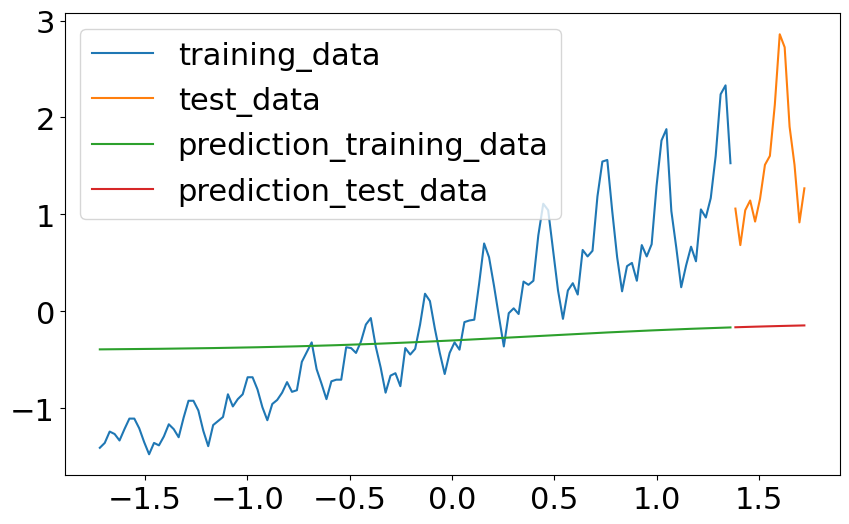

In [ ]:
#Plot new model performance
sns.lineplot(x=xTraining, y=yTraining, label='training_data')
sns.lineplot(x=xTest, y=yTest, label='test_data')
sns.lineplot(x=xTraining, y=y_predict[:,0], label='prediction_training_data')
sns.lineplot(x=xTest, y=y_predict_test[:,0], label='prediction_test_data')

In [ ]:
#Define vector
vector = pd.DataFrame(yTraining)[0]

#Function to predict next year numbers
def separe_datas(vector, n_steps):
  x_novo,y_novo = [], []

  for i in range(n_steps, vector.shape[0]):
    x_novo.append(list(vector.loc[i-n_steps:i-1]))
    y_novo.append(vector.loc[i])

  x_novo, y_novo = np.array(x_novo), np.array(y_novo)

  return x_novo, y_novo

In [ ]:
xTraining_new, yTraining_new = separe_datas(vector, 1)

In [ ]:
xTraining_new[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
yTraining_new[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [ ]:
#Apply for tests also
vector_2 = pd.DataFrame(yTest)[0]
xTest_new, yTest_new = separe_datas(vector_2, 1)

In [ ]:
#Third model to test
regressor_3 = Sequential()
regressor_3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_3.compile(loss='mean_squared_error', optimizer='adam')

#training new model
regressor_3.fit(xTraining_new, yTraining_new, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8538  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8248
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7543 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6487 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6192 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6378 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6761 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7165 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5887 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6244
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5272 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4633 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4691 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3821 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3915
Epoch 16/100
4/4 ━━━━━━━━━━━━━

In [ ]:
#Predict new model
y_predict_third = regressor_3.predict(xTraining_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


<Axes: xlabel='tempo'>

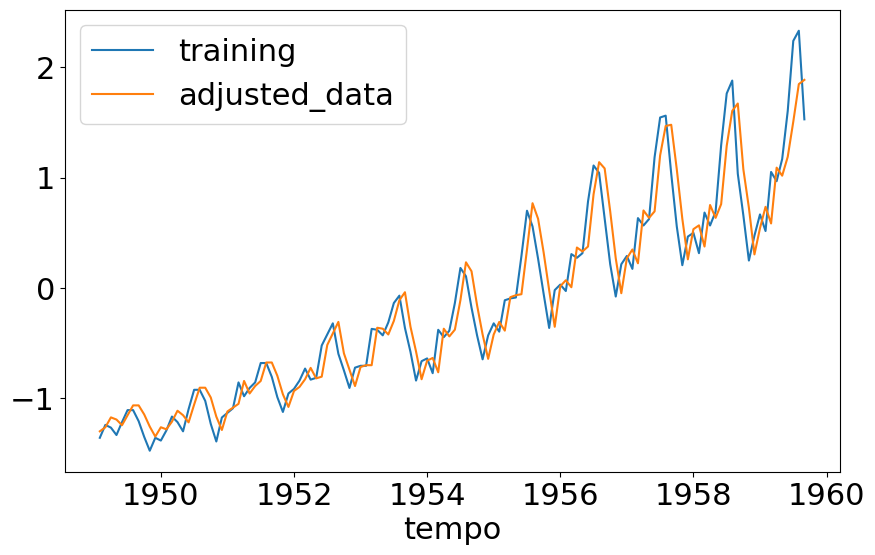

In [ ]:
#Plot third model training
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[1:129], label='training')
sns.lineplot(x='tempo', y=y_predict_third[:,0], data=passenger[1:129], label='adjusted_data')

In [ ]:
#Predict test
y_predict_test_third = regressor_3.predict(xTest_new)
results_test_new = pd.DataFrame(y_predict_test_third)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


<Axes: xlabel='tempo'>

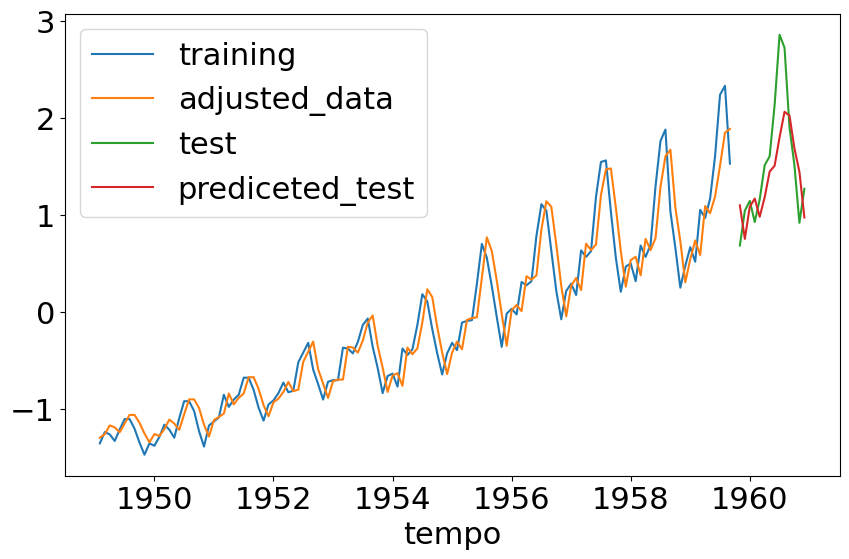

In [ ]:
#Plot third model
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[1:129], label='training')
sns.lineplot(x='tempo', y=y_predict_third[:,0], data=passenger[1:129], label='adjusted_data')
sns.lineplot(x='tempo', y=yTest_new, data=passenger[130:144], label='test')
sns.lineplot(x='tempo', y=results_test_new.values, data=passenger[130:144], label='prediceted_test')

In [ ]:
xTraining_new, yTraining_new = separe_datas(vector, 4)

In [ ]:
xTraining_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
yTraining_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xTest_new, yTest_new = separe_datas(vector_2, 4)

In [ ]:
#fourth  model to test
regressor_4 = Sequential()
regressor_4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_4.compile(loss='mean_squared_error', optimizer='adam')

#training new model
regressor_4.fit(xTraining_new, yTraining_new, epochs=300)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8070  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6625
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6173
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5320
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4492
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4351
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3429
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3101 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2541
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2204
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1541 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1852
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1623
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1470
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1295 
Epoch 16/300
4/4 ━━━━━━━━━━

In [ ]:
#Predict training and test fourth
y_predict_fourth = regressor_4.predict(xTraining_new)
y_predict_test_fourth = regressor_4.predict(xTest_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
#Results fourth model
results_training_fourth = pd.DataFrame(y_predict_fourth)[0]
results_test_fourth = pd.DataFrame(y_predict_test_fourth)[0]

<Axes: xlabel='tempo', ylabel='0'>

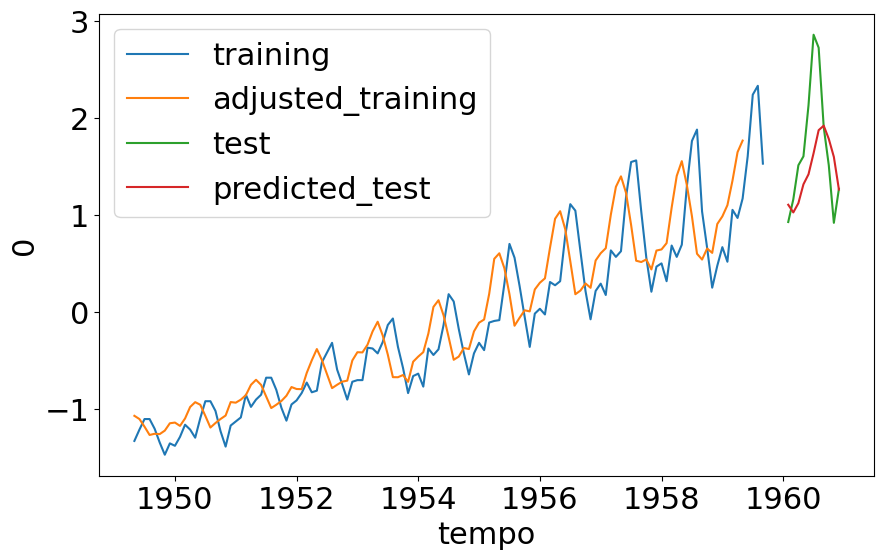

In [ ]:
#Plot fourth model
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[4:129], label='training')
sns.lineplot(x='tempo', y=results_training_fourth, data=passenger[4:129], label='adjusted_training')
sns.lineplot(x='tempo', y=yTest_new, data=passenger[133:144], label='test')
sns.lineplot(x='tempo', y=results_test_fourth.values, data=passenger[133:144], label='predicted_test')

In [ ]:
new_url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
new_datas = pd.read_csv(new_url)
new_datas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
new_datas['datas'] = pd.to_datetime(new_datas['datas'])
new_datas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

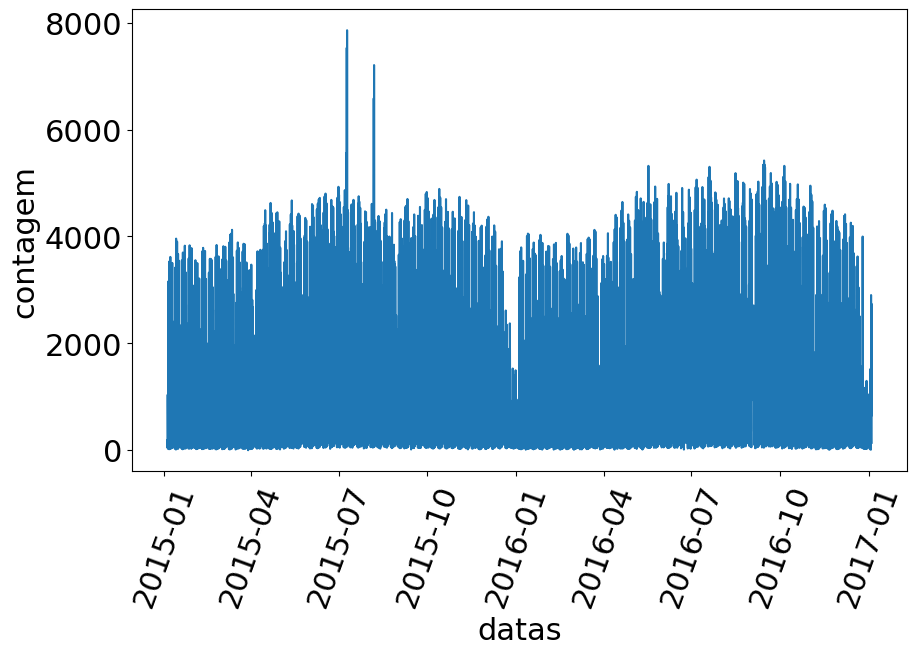

In [ ]:
sns.lineplot(x='datas', y='contagem', data=new_datas)
mpl.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()
sc2.fit(new_datas['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(new_datas['contagem'].values.reshape(-1,1))

In [ ]:
size_training_new = int(len(new_datas) * 0.9)
size_testing_new = len(new_datas) - size_training_new
yTraining_new = y[0: size_training_new]
yTest_new = y[size_training_new: len(new_datas)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

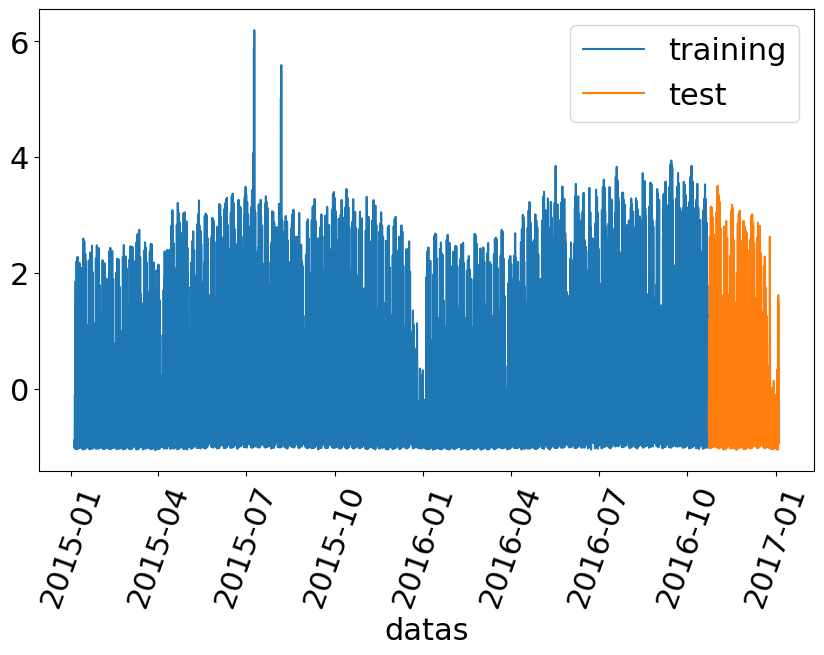

In [ ]:
sns.lineplot(x='datas', y=yTraining_new[:,0], data=new_datas[0:size_training_new], label='training')
sns.lineplot(x='datas', y=yTest_new[:,0], data=new_datas[size_training_new:len(new_datas)], label='test')
mpl.xticks(rotation=70)

In [ ]:
new_vector = pd.DataFrame(yTraining_new)[0]
new_vector_2 = pd.DataFrame(yTest_new)[0]
x_training_new, y_training_new = separe_datas(new_vector, 10)
x_test_new, y_test_new = separe_datas(new_vector_2, 10)

In [ ]:
x_training_new = x_training_new.reshape((x_training_new.shape[0], x_training_new.shape[1], 1))
x_test_new = x_test_new.reshape((x_test_new.shape[0], x_test_new.shape[1], 1))

In [ ]:
recurring_model = Sequential()

recurring_model.add(LSTM(128, input_shape=(x_training_new.shape[1], x_training_new.shape[2])))
recurring_model.add(Dense(units=1))

recurring_model.compile(loss='mean_squared_error', optimizer='RMSProp')
recurring_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
results = recurring_model.fit(x_training_new, y_training_new, validation_data=(x_test_new, y_test_new), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - loss: 0.4560 - val_loss: 0.1164
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0993 - val_loss: 0.0494
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.0625 - val_loss: 0.0467
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 0.0486 - val_loss: 0.0429
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0479 - val_loss: 0.0428
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - loss: 0.0424 - val_loss: 0.0377
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0401 - val_loss: 0.0241
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0346 - val_loss: 0.0286
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.0380 - val_loss: 0.0257
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0370 - val_loss: 0.0243
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.0320 - val_loss: 0.0217
Epoch 12/100
490/49

In [ ]:
y_adjusted = recurring_model.predict(x_training_new)

490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

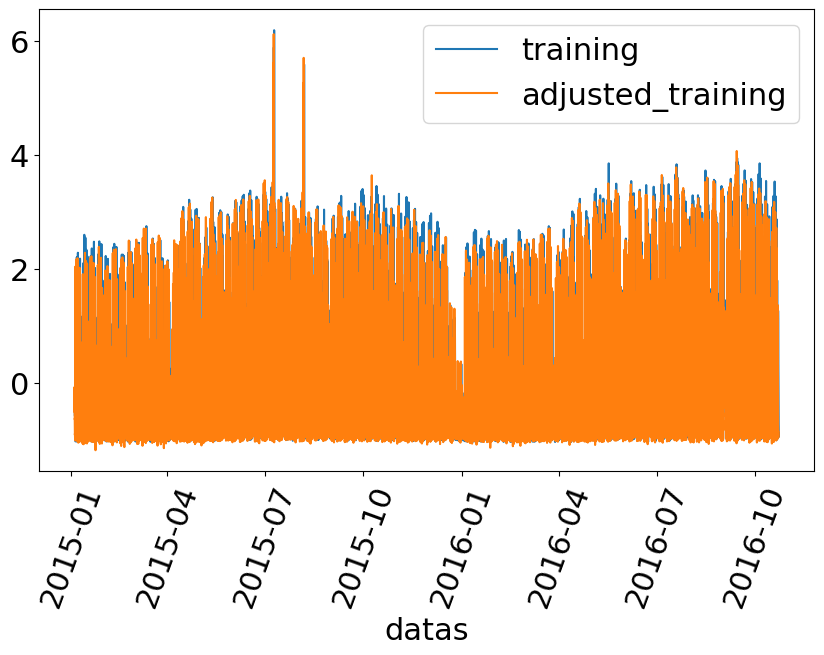

In [ ]:
sns.lineplot(x='datas', y=y_training_new, data=new_datas[10:size_training_new], label='training')
sns.lineplot(x='datas', y=y_adjusted[:,0], data=new_datas[0:15662], label='adjusted_training')
mpl.xticks(rotation=70)

In [ ]:
y_predict_new = recurring_model.predict(x_test_new)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

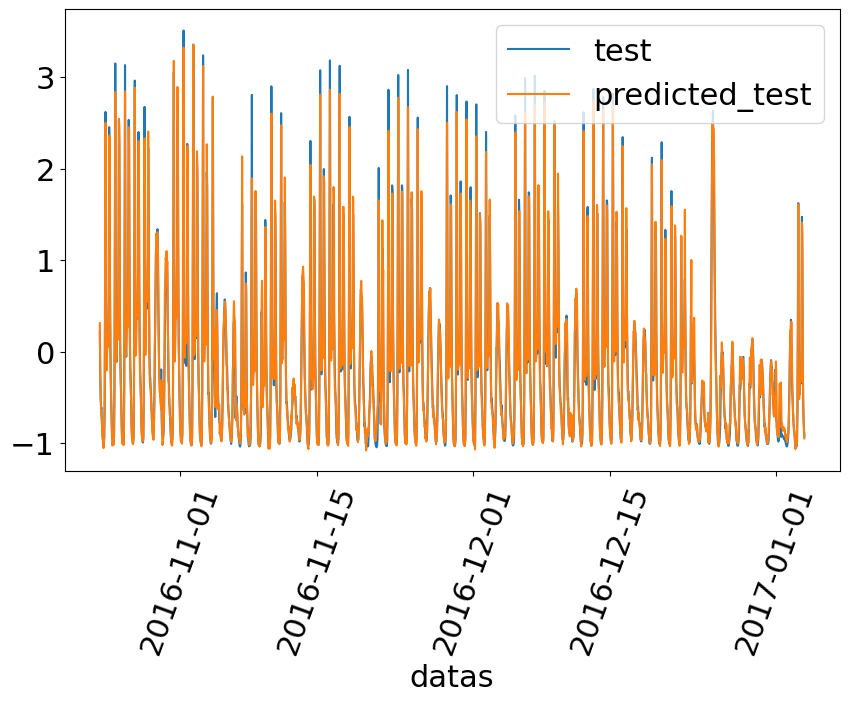

In [ ]:
sns.lineplot(x='datas', y=y_test_new, data=new_datas[size_training_new + 10:len(new_datas)], label='test')
sns.lineplot(x='datas', y=y_predict_new[:,0], data=new_datas[size_training_new + 10: len(new_datas)], label='predicted_test')
mpl.xticks(rotation=70)

In [ ]:
recurring_g = Sequential()

recurring_g.add(GRU(128, input_shape=(x_training_new.shape[1], x_training_new.shape[2])))
recurring_g.add(Dense(units=1))

recurring_g.compile(loss='mean_squared_error', optimizer='RMSProp')

recurring_g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result_2 = recurring_g.fit(x_training_new, y_training_new, validation_data=(x_test_new, y_test_new), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 0.3766 - val_loss: 0.0688
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0782 - val_loss: 0.0460
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.0537 - val_loss: 0.0365
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0448 - val_loss: 0.0247
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 0.0396 - val_loss: 0.0283
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0357 - val_loss: 0.0266
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0373 - val_loss: 0.0247
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0336 - val_loss: 0.0193
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0336 - val_loss: 0.0244
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0293 - val_loss: 0.0314
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0281 - val_loss: 0.0226
Epoch 12/100
490/49

In [ ]:
y_predict_training_2 = recurring_g.predict(x_training_new)
y_predict_test_2 = recurring_g.predict(x_test_new)

490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

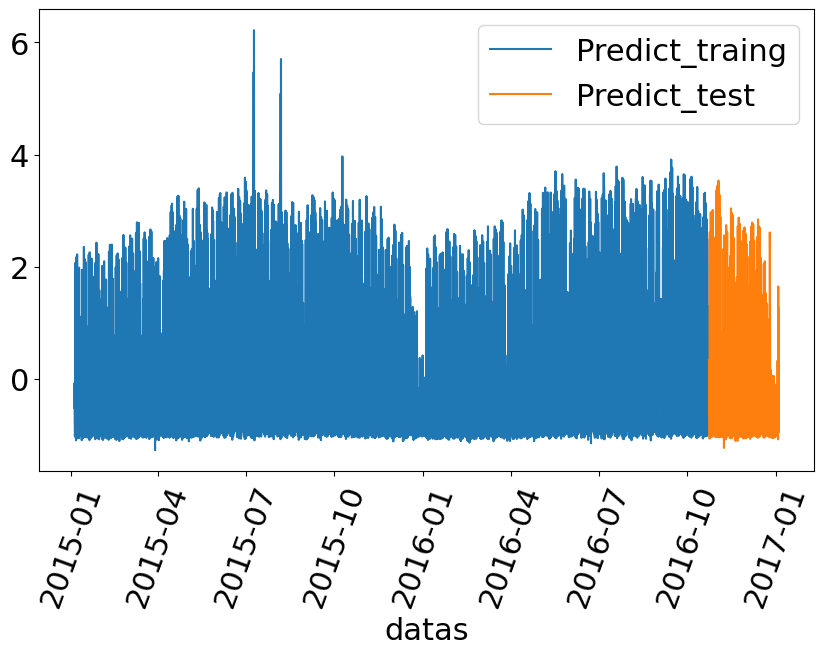

In [ ]:
sns.lineplot(x='datas', y=y_predict_training_2[:,0], data=new_datas[10:size_training_new], label='Predict_traing') # Access the first (and only) column of the 2D array
sns.lineplot(x='datas', y=y_predict_test_2[:,0], data=new_datas[size_training_new + 10: len(new_datas)], label='Predict_test')
mpl.xticks(rotation=70)

Text(0, 0.5, 'Costs')

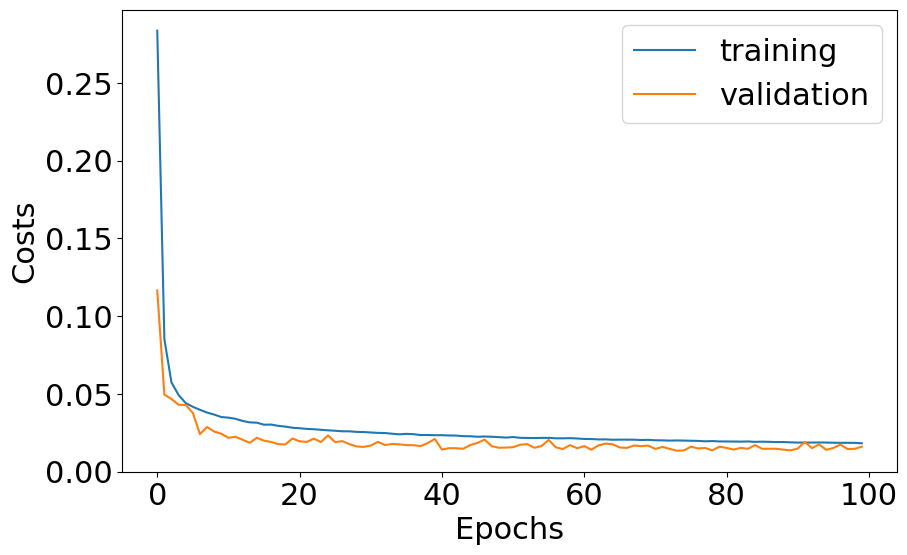

In [ ]:
mpl.plot(results.history['loss'])
mpl.plot(results.history['val_loss'])
mpl.legend(['training', 'validation'])
mpl.xlabel('Epochs')
mpl.ylabel('Costs')

Text(0, 0.5, 'Costs')

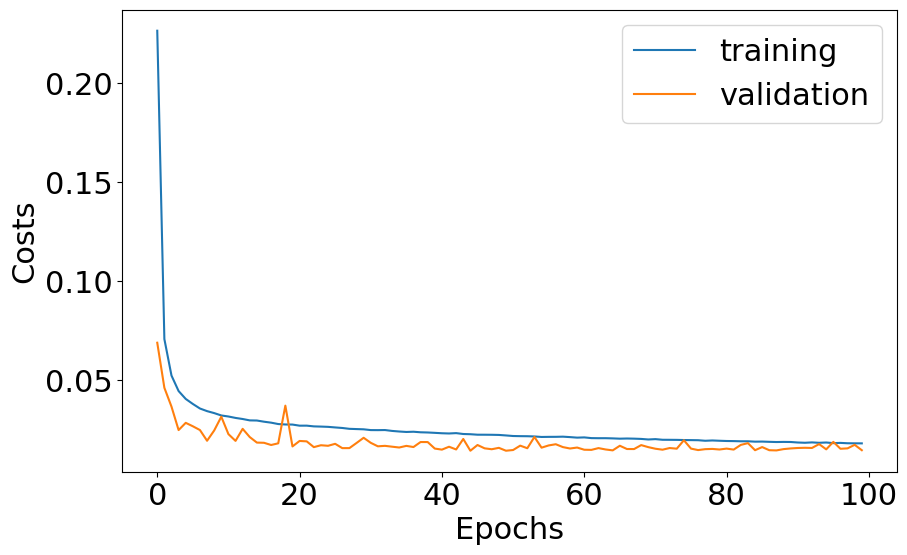

In [ ]:
mpl.plot(result_2.history['loss'])
mpl.plot(result_2.history['val_loss'])
mpl.legend(['training', 'validation'])
mpl.xlabel('Epochs')
mpl.ylabel('Costs')